In [1]:
#importing librairies
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pltp 
import string


In [2]:
#importing the csv file and cleaning up our data
df = pd.read_csv('./titanic-passengers_x.csv')
#p = df.drop(["name","age","smoke","drink"], axis = 1)
#cleanup={"sex":{'M':1,'F':0}}
#df.replace(cleanup,inplace=True)
df= df.drop(["Unnamed: 0"], axis = 1)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,Nasser Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,Sirayanian Mr. Orsen,male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,Cacic Miss. Marija,female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"""Petroff Mr. Pastcho (""""Pentcho"""")""",male,NaN,0,0,349215,7.8958,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='Count'>

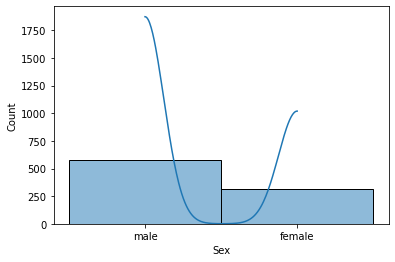

In [3]:
#show the distribution of people (feature = sex)
sns.histplot(df['Sex'],bins=5,kde=True)


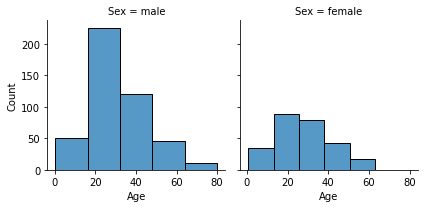

In [4]:
#this is gonna show the corralation between sex and age
p = sns.FacetGrid(df,col="Sex")
p.map(sns.histplot,"Age",bins=5)

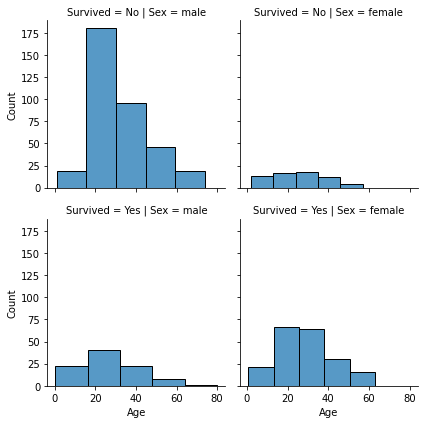

In [5]:
#this is gonna show the corralation between the person's sex and their habits (smoker or not) and  their age
p = sns.FacetGrid(df,col="Sex",row="Survived")
p.map(sns.histplot,"Age",bins=5)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000


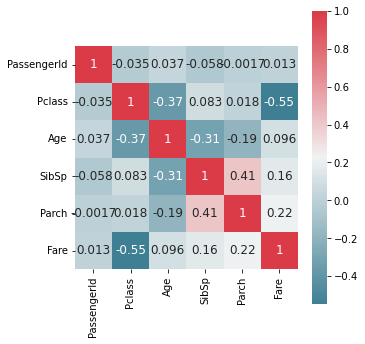

In [6]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = pltp.subplots( figsize =( 5 , 6 ) )

    cmap = sns.diverging_palette( 220 , 10, as_cmap = True )
    print(corr)

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 


        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
  
plot_correlation_map( df )    

In [7]:
"""this function will allow us the visulize the corralation between the different data in this dataset using a heat map (with
the data being normalized so that we can have a more accuratly visualization)"""

'this function will allow us the visulize the corralation between the different data in this dataset using a heat map (with\nthe data being normalized so that we can have a more accuratly visualization)'

In [8]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",
    
                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
alph = string.ascii_lowercase
alph += string.ascii_uppercase
alph = list(alph)


d = df['Name']
df= df.drop(['Name'], axis = 1)
l = []
for s in d:
    ch = s
    aux = ch.split(' ')
    ttl = aux[1]
    if ttl == 'The' and aux[2] == 'Countess':
        ttl = "the Countess"
        
    if (not(ttl[len(ttl)-1] in alph) ):    
        ttl.replace(ttl[len(ttl)-1],'')
        
    if ttl in d.keys():
        l.append(Title_Dictionary[ttl])
    else:
        l.append(ttl)

    
"""    
for c in d:
    title = c 
    j = 0
    x = ''
    while title[j] != ' ':
        x += title[j]
        j+=1
    l.append(Title_Dictionary[x])"""
   
df["Title"] = l   


In [9]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,Mr.
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr.
2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,Mr.
3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,Mrs.
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,NaN,C,Mrs.
887,61,No,3,male,22.0,0,0,2669,7.2292,NaN,C,Mr.
888,535,No,3,female,30.0,0,0,315084,8.6625,NaN,S,Miss.
889,102,No,3,male,NaN,0,0,349215,7.8958,NaN,S,Mr.
